In [173]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [174]:
data_file = '../results/fit.csv'
paramsGen, errorsGen, paramsR, errorsR, paramsL, errorsL, paramsC, errorsC = np.loadtxt(data_file, delimiter = ',', skiprows = 1,usecols=(0,1,2,3,4,5,6,7) ,unpack = True)

print('V_0    = ','{:.5f}'.format(paramsGen[0]), '±', '{:.5f}'.format(errorsGen[0]), ' V')

print()
print('R_r  = ','{:.3f}'.format(paramsR[0]), '±', '{:.3f}'.format(errorsR[0]), 'Ohm')
print('R    = ','{:.3f}'.format(paramsR[1]), '±', '{:.3f}'.format(errorsR[1]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsR[2]), '±', '{:.5f}'.format(errorsR[2]), ' Henry')
print('C    = ','{:.12f}'.format(paramsR[3]), '±', '{:.12f}'.format(errorsR[3]), ' F')
print('V_0  = ','{:.4f}'.format(paramsR[4]), '±', '{:.4f}'.format(errorsR[4]), ' V')

print()
print('R    = ','{:.3f}'.format(paramsL[0]), '±', '{:.3f}'.format(errorsL[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsL[1]), '±', '{:.5f}'.format(errorsL[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsL[2]), '±', '{:.12f}'.format(errorsL[2]), ' F')
print('V_0    = ','{:.3f}'.format(paramsL[3]), '±', '{:.10f}'.format(errorsL[3]), ' V')

print()
print('R    = ','{:.3f}'.format(paramsC[0]), '±', '{:.3f}'.format(errorsC[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsC[1]), '±', '{:.5f}'.format(errorsC[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsC[2]), '±', '{:.15f}'.format(errorsC[2]), ' F')
print('V_0    = ','{:.4f}'.format(paramsC[3]), '±', '{:.4f}'.format(errorsC[3]), ' V')

V_0    =  2.50000 ± 0.01000  V

R_r  =  1010.000 ± 7.190 Ohm
R    =  1140.000 ± 7.550 Ohm
L    =  0.04710 ± 0.00017  Henry
C    =  0.000000001520 ± 0.000000000005  F
V_0  =  2.4500 ± 0.0113  V

R    =  2130.000 ± 0.009 Ohm
L    =  0.04560 ± 0.00000  Henry
C    =  0.000000001560 ± 0.000000000000  F
V_0    =  2.440 ± 0.0000069600  V

R    =  1910.000 ± 0.006 Ohm
L    =  0.04080 ± 0.00000  Henry
C    =  0.000000001770 ± 0.000000000000003  F
V_0    =  2.4300 ± 0.0000  V


In [175]:
def Gen_amp_model(f, V_0):
    return V_0
def R_amp_model(f, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( (R_r+R)**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def L_amp_model(f, R, L, C, V_0):
    num = 2*np.pi*f * L * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def C_amp_model(f, R, L, C, V_0):
    num = V_0 / (2*np.pi*f * C)
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den

f = np.linspace(5000,35000,1000)


ampGen = np.full((len(f), 1),paramsGen[0])
ampR = R_amp_model(f,paramsR[0],paramsR[1],paramsR[2],paramsR[3],paramsR[4])
ampL = L_amp_model(f,paramsL[0],paramsL[1],paramsL[2],paramsL[3])
ampC = C_amp_model(f,paramsC[0],paramsC[1],paramsC[2],paramsC[3])

In [176]:
data_file = '../data/III session/Frequency response/amplitudes_fino35kHz.csv'
frequencies, amplitudeGen, amplitudeR, amplitudeL, amplitudeC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

# Amplitudes analysis

In [177]:
error = .0002

error *= 200

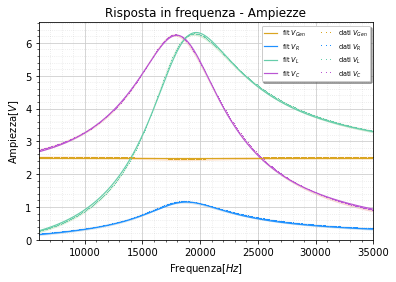

In [178]:
fig, axs = plt.subplots()
l0, = axs.plot(f,ampGen,color='goldenrod',linestyle='solid',linewidth=1.2)
l1, = axs.plot(f,ampR,color='dodgerblue',linestyle='solid',linewidth=1.2)
l2, = axs.plot(f,ampL,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
l3, = axs.plot(f,ampC,color='mediumorchid',linestyle='solid',linewidth=1.2)
axs.set_xlim(6000,35000)
axs.set_ylim(0)
axs.set_title(r'Risposta in frequenza - Ampiezze')
axs.set_xlabel(r'Frequenza$[Hz]$')
axs.set_ylabel(r'Ampiezza$[V]$')
axs.grid(visible=True, which='major', color='0.8', linestyle='-')
axs.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axs.minorticks_on()

###### Experimental data
m0 , = axs.plot(frequencies,amplitudeGen,marker=',',markersize=2,linestyle='None',color='goldenrod')
m1, = axs.plot(frequencies,amplitudeR,marker=',',markersize=2,linestyle='None',color='dodgerblue')
m2, = axs.plot(frequencies,amplitudeL,marker=',',markersize=2,linestyle='None',color='mediumaquamarine')
m3, = axs.plot(frequencies,amplitudeC,marker=',',markersize=2,linestyle='None',color='mediumorchid')

axs.fill_between(frequencies, amplitudeR - error, amplitudeR + error, alpha=0.2)
axs.fill_between(frequencies,amplitudeGen - error, amplitudeGen + error,alpha=0.2)
axs.fill_between(frequencies,amplitudeL - error, amplitudeL + error,alpha=0.2)
axs.fill_between(frequencies,amplitudeC - error, amplitudeC + error,alpha=0.2)
# axs.fill_between(f, ampR - error, ampR + error, alpha=0.2)
# axs.fill_between(f,ampGen - error, ampGen + error,alpha=0.2)
# axs.fill_between(f,ampL - error, ampL + error,alpha=0.2)
# axs.fill_between(f,ampC - error, ampC + error,alpha=0.2)

axs.legend((l0, l1, l2, l3, m0 ,m1,m2,m3), (r'fit $V_{Gen}$','fit $V_R$', 'fit $V_L$','fit $V_C$','dati $V_{Gen}$','dati $V_R$','dati $V_L$','dati $V_C$'),ncol=2, loc='upper right', shadow=True,fancybox=True,fontsize=6.5,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})
plt.savefig('../figs/Risposta-in-frequenza-ampiezze.pdf')

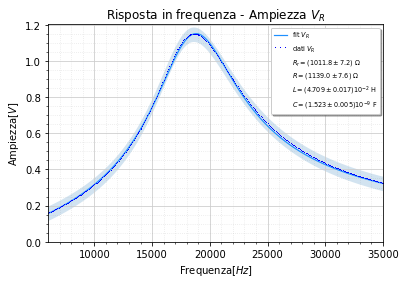

In [179]:
fig_, axs_ = plt.subplots()
l0, = axs_.plot(f,ampR,color='dodgerblue',linestyle='solid',linewidth=1.2)
R_r, = axs_.plot([], [], ' ', label="Extra label on the legend")
R, = axs_.plot([], [], ' ', label="Extra label on the legend")
L, = axs_.plot([], [], ' ', label="Extra label on the legend")
C, = axs_.plot([], [], ' ', label="Extra label on the legend")

axs_.set_xlim(6000,35000)
axs_.set_ylim(0)
axs_.set_title(r'Risposta in frequenza - Ampiezza $V_R$')
axs_.set_xlabel(r'Frequenza$[Hz]$')
axs_.set_ylabel(r'Ampiezza$[V]$')
axs_.grid(visible=True, which='major', color='0.8', linestyle='-')
axs_.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axs_.minorticks_on()

###### Experimental data
m0, = axs_.plot(frequencies,amplitudeR,marker=',',markersize=2,linestyle='None',color='blue')


axs_.fill_between(frequencies, amplitudeR - error, amplitudeR + error, alpha=0.2)

# axs.fill_between(f, ampR - error, ampR + error, alpha=0.2)
strR_r = '$R_r = (1011.8 \pm 7.2) \ \Omega$'
strR = '$R = (1139.0 \pm 7.6) \ \Omega$'
strL = '$L = (4.709 \pm 0.017)10^{-2}$ H'
strC = '$C = (1.523 \pm 0.005)10^{-9}$ F'
axs_.legend((l0, m0, R_r,R,L,C), (r'fit $V_R$','dati $V_R$',strR_r,strR,strL,strC),ncol=1, loc='upper right', shadow=True,fancybox=True,fontsize=6.5,handler_map={m0: HandlerLine2D(numpoints=3)})
# axs_.legend([],[],title='Parametri fit',label='prova')
plt.savefig('../figs/Risposta-in-frequenza-ampiezza-resistenza.pdf')

## Tension-time qualitative analysis

In [180]:
file_folder = '../data/III session/Voltage-time/'
file_name = 'VTime16kHz.csv'
data_file = file_folder + file_name
time16,V_gen16, V_R16, V_L16, V_C16  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)
file_name = 'VTime22kHz.csv'
data_file = file_folder + file_name
time22,V_gen22, V_R22, V_L22, V_C22  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

folder = '../data/III session/Voltage-time/'
file_name = 'squareWave10Hz.csv'
data_file = folder + file_name
V_gen_sw = np.loadtxt(data_file, delimiter=',', skiprows=1, usecols=(1), unpack=True)

from statistics import stdev

error_voltage = stdev(V_gen_sw)


In [181]:
## deleting the first period values(anomaly)
# indeces = [0,1,2,3,4,5,6]
# indeces = []
# time16 = np.delete(time16, indeces)
# V_gen16 = np.delete(V_gen16, indeces)
# V_R16 = np.delete(V_R16, indeces)
# V_L16 = np.delete(V_L16, indeces)
# V_C16 = np.delete(V_C16, indeces)
#
# time22 = np.delete(time22, indeces)
# V_gen22 = np.delete(V_gen22, indeces)
# V_R22 = np.delete(V_R22, indeces)
# V_L22 = np.delete(V_L22, indeces)
# V_C22 = np.delete(V_C22, indeces)
# time16

#### Data interpolation(we only need to verify the qualitative behaviour)

In [182]:
from scipy import interpolate

x= time16
y = V_gen16
f_gen = interpolate.interp1d(x, y)
y = V_R16
f_R = interpolate.interp1d(x, y)
y = V_L16
f_L = interpolate.interp1d(x, y)
y = V_C16
f_C = interpolate.interp1d(x, y)

x_new_16 = np.linspace(0.0000,0.0006,10000)
y_gen_16 = f_gen(x_new_16)
y_R_16 = f_R(x_new_16)
y_L_16 = f_L(x_new_16)
y_C_16 = f_C(x_new_16)

In [183]:
x = time22
y = V_gen22
f_gen = interpolate.interp1d(x, y)
y = V_R22
f_R = interpolate.interp1d(x, y)
y = V_L22
f_L = interpolate.interp1d(x, y)
y = V_C22
f_C = interpolate.interp1d(x, y)

x_new_22 = np.linspace(0.00000,0.0006,10000)
y_gen_22 = f_gen(x_new_22)
y_R_22 = f_R(x_new_22)
y_L_22 = f_L(x_new_22)
y_C_22 = f_C(x_new_22)



### con interpolazione

In [184]:
# fig = plt.figure(figsize=(20, 11))
# titles_size = 25
# labels_size = 18
# subfigs = fig.subfigures(1, 2, wspace=0.02)
# # subfigs[0].suptitle('Andamento della tensione - $16$ kHz', fontsize=titles_size)
# # subfigs[1].suptitle('Andamento della tensione - $22$ kHz', fontsize=titles_size)
#
# axsLeft = subfigs[0].subplots(1, 1)
# axsRight = subfigs[1].subplots(1, 1)
#
#
# m0, = axsLeft.plot(time16,V_gen16,marker='o',markersize=2,color='goldenrod',linestyle='None')
# m1, = axsLeft.plot(time16,V_R16,marker='o',markersize=2,color='dodgerblue',linestyle='None')
# m2, = axsLeft.plot(time16,V_L16,marker='o',markersize=2,color='mediumaquamarine',linestyle='None')
# m3, = axsLeft.plot(time16,V_C16,marker='o',markersize=2,color='mediumorchid',linestyle='None')
# l0, = axsLeft.plot(x_new_16,y_gen_16,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1, = axsLeft.plot(x_new_16,y_R_16,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2, = axsLeft.plot(x_new_16,y_L_16,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3, = axsLeft.plot(x_new_16,y_C_16,color='mediumorchid',linestyle='solid',linewidth=1.2)
#
# axsLeft.set_xlim(-0.00001,0.0006)
# axsLeft.set_ylim(-6,6)
# axsLeft.set_title(r'Andamento della tensione - $16$ kHz',fontsize=20)
# axsLeft.set_xlabel(r'Tempo$[s]$',fontsize=12)
# axsLeft.set_ylabel(r'Tensione$[V]$',fontsize=12)
# axsLeft.grid(visible=True, which='major', color='0.8', linestyle='-')
# axsLeft.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
# axsLeft.minorticks_on()
# axsLeft.legend((m0 ,m1,m2,m3), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})
#
# m0_, = axsRight.plot(time22,V_gen22,marker='o',markersize=2,color='goldenrod',linestyle='None')
# m1_, = axsRight.plot(time22,V_R22,marker='o',markersize=2,color='dodgerblue',linestyle='None')
# m2_, = axsRight.plot(time22,V_L22,marker='o',markersize=2,color='mediumaquamarine',linestyle='None')
# m3_, = axsRight.plot(time22,V_C22,marker='o',markersize=2,color='mediumorchid',linestyle='None')
# l0_, = axsRight.plot(x_new_22,y_gen_22,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1_, = axsRight.plot(x_new_22,y_R_22,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2_, = axsRight.plot(x_new_22,y_L_22,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3_, = axsRight.plot(x_new_22,y_C_22,color='mediumorchid',linestyle='solid',linewidth=1.2)
#
# axsRight.set_xlim(0,0.0006)
# # axsRight.set_ylim(-6,6)
# axsRight.set_title(r'Andamento della tensione - $22$ kHz',fontsize=20)
# axsRight.set_xlabel(r'Tempo$[s]$',fontsize=12)
# axsRight.set_ylabel(r'Tensione$[V]$',fontsize=12)
# axsRight.grid(visible=True, which='major', color='0.8', linestyle='-')
# axsRight.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
# axsRight.minorticks_on()
# axsRight.legend((m0_ ,m1_,m2_,m3_), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0_: HandlerLine2D(numpoints=3),m1_: HandlerLine2D(numpoints=3),m2_: HandlerLine2D(numpoints=3),m3_: HandlerLine2D(numpoints=3)})
#
#
# plt.savefig('../figs/tensione-tempo.pdf')

### Con plot

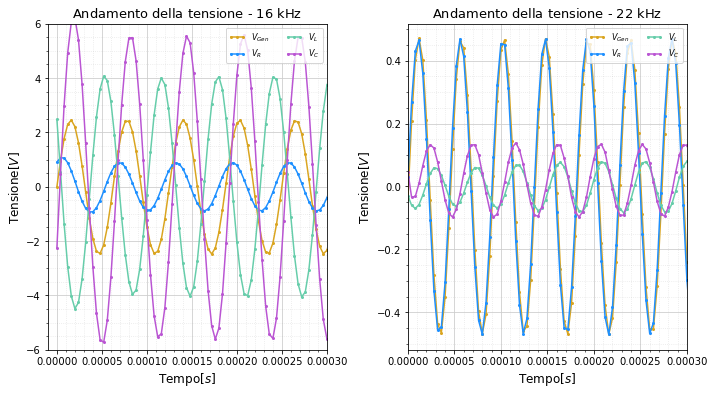

In [219]:
# fig = plt.figure(figsize=(16,9))
fig = plt.figure(figsize=(10,6))

titles_size = 13
labels_size = 9
subfigs = fig.subfigures(1, 2)
# subfigs[0].suptitle('Andamento della tensione - $16$ kHz', fontsize=titles_size)
# subfigs[1].suptitle('Andamento della tensione - $22$ kHz', fontsize=titles_size)

axsLeft = subfigs[0].subplots(1, 1)
axsRight = subfigs[1].subplots(1, 1)


m0, = axsLeft.plot(time16,V_gen16,marker='o',markersize=2,color='goldenrod',linestyle='solid')
m1, = axsLeft.plot(time16,V_R16,marker='o',markersize=2,color='dodgerblue',linestyle='solid')
m2, = axsLeft.plot(time16,V_L16,marker='o',markersize=2,color='mediumaquamarine',linestyle='solid')
m3, = axsLeft.plot(time16,V_C16,marker='o',markersize=2,color='mediumorchid',linestyle='solid')
# l0, = axsLeft.plot(x_new_16,y_gen_16,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1, = axsLeft.plot(x_new_16,y_R_16,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2, = axsLeft.plot(x_new_16,y_L_16,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3, = axsLeft.plot(x_new_16,y_C_16,color='mediumorchid',linestyle='solid',linewidth=1.2)

axsLeft.set_xlim(-0.00001,0.0003)
axsLeft.set_ylim(-6,6)
axsLeft.set_title(r'Andamento della tensione - $16$ kHz',fontsize=13)
axsLeft.set_xlabel(r'Tempo$[s]$',fontsize=12)
axsLeft.set_ylabel(r'Tensione$[V]$',fontsize=12)
axsLeft.grid(visible=True, which='major', color='0.8', linestyle='-')
axsLeft.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axsLeft.minorticks_on()
axsLeft.legend((m0 ,m1,m2,m3), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})

m0_, = axsRight.plot(time22,V_gen22,marker='o',markersize=2,color='goldenrod',linestyle='solid')
m1_, = axsRight.plot(time22,V_R22,marker='o',markersize=2,color='dodgerblue',linestyle='solid')
m2_, = axsRight.plot(time22,V_L22,marker='o',markersize=2,color='mediumaquamarine',linestyle='solid')
m3_, = axsRight.plot(time22,V_C22,marker='o',markersize=2,color='mediumorchid',linestyle='solid')
# l0_, = axsRight.plot(x_new_22,y_gen_22,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1_, = axsRight.plot(x_new_22,y_R_22,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2_, = axsRight.plot(x_new_22,y_L_22,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3_, = axsRight.plot(x_new_22,y_C_22,color='mediumorchid',linestyle='solid',linewidth=1.2)

axsRight.set_xlim(0,0.0003)
# axsRight.set_ylim(-6,6)
axsRight.set_title(r'Andamento della tensione - $22$ kHz',fontsize=13)
axsRight.set_xlabel(r'Tempo$[s]$',fontsize=12)
axsRight.set_ylabel(r'Tensione$[V]$',fontsize=12)
axsRight.grid(visible=True, which='major', color='0.8', linestyle='-')
axsRight.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axsRight.minorticks_on()
axsRight.legend((m0_ ,m1_,m2_,m3_), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0_: HandlerLine2D(numpoints=3),m1_: HandlerLine2D(numpoints=3),m2_: HandlerLine2D(numpoints=3),m3_: HandlerLine2D(numpoints=3)})


plt.savefig('../figs/tensione-tempo.pdf')

## Fasi

In [186]:
data_file = '../results/fit.csv'
paramsGen, errorsGen, paramsR, errorsR, paramsL, errorsL, paramsC, errorsC = np.loadtxt(data_file, delimiter = ',', skiprows = 1,usecols=(9,10,11,12,13,14,15,16) ,unpack = True)

print(r' $\phi$ = ','{:.5f}'.format(paramsGen[0]), '±', '{:.5f}'.format(errorsGen[0]), ' rad')

print()
print('R    = ','{:.3f}'.format(paramsR[0]), '±', '{:.3f}'.format(errorsR[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsR[1]), '±', '{:.5f}'.format(errorsR[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsR[2]), '±', '{:.12f}'.format(errorsR[2]), ' F')

print()
print('R    = ','{:.3f}'.format(paramsL[0]), '±', '{:.3f}'.format(errorsL[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsL[1]), '±', '{:.5f}'.format(errorsL[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsL[2]), '±', '{:.12f}'.format(errorsL[2]), ' F')

print()
print('R    = ','{:.3f}'.format(paramsC[0]), '±', '{:.3f}'.format(errorsC[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsC[1]), '±', '{:.5f}'.format(errorsC[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsC[2]), '±', '{:.15f}'.format(errorsC[2]), ' F')

 $\phi$ =  -0.00143 ± 0.00008  rad

R    =  2380.000 ± 22.200 Ohm
L    =  0.04690 ± 0.00044  Henry
C    =  0.000000001460 ± 0.000000000014  F

R    =  2520.000 ± 21.500 Ohm
L    =  0.04570 ± 0.00039  Henry
C    =  0.000000001430 ± 0.000000000012  F

R    =  2700.000 ± 59.400 Ohm
L    =  0.04140 ± 0.00091  Henry
C    =  0.000000001280 ± 0.000000000028200  F


In [187]:
def Gen_phase_model(f,phi_gen):
    return phi_gen

def R_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den)

def L_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den) + np.pi/2

def C_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den) - np.pi/2

In [188]:
f = np.linspace(5000,25000,1000)

phaseGen = np.full((len(f), 1),paramsGen[0])
phaseR = R_phase_model(f,paramsR[0],paramsR[1],paramsR[2])
phaseL = L_phase_model(f,paramsL[0],paramsL[1],paramsL[2])
phaseC = C_phase_model(f,paramsC[0],paramsC[1],paramsC[2])

In [189]:
data_file = '../data/III session/Frequency response/phases_fino25kHz.csv'
frequencies, dataGen, dataR, dataL, dataC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)



In [190]:
fake_f = np.arange(10000,25000,100)

faseR = R_phase_model(fake_f,2400,0.0474,1.46e-09)
faseL = L_phase_model(fake_f,2100,0.0474,1.46e-09)
faseC = C_phase_model(fake_f,2100,0.0474,1.46e-09)


for i in range(len(faseR)):
    if(i < 90):
     faseR[i] = np.random.normal(faseR[i],0.007)
    else:
     faseR[i] = np.random.normal(faseR[i],0.01)

for i in range(len(faseL)):
    if(i < 90):
        faseL[i] = np.random.normal(faseL[i],0.009)
    else:
        faseL[i] = np.random.normal(faseL[i],0.015)

for i in range(len(faseC)):
    if(i < 90):
        faseC[i] = np.random.normal(faseC[i],0.015)
    else:
        faseC[i] = np.random.normal(faseC[i],0.023)


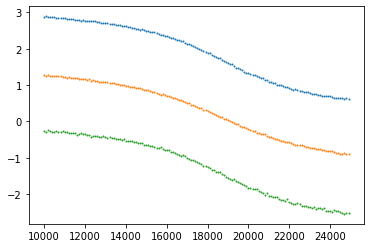

In [191]:
plt.plot(fake_f,faseL,marker='o',linestyle='None',markersize=1)
plt.plot(fake_f,faseR,marker='o',linestyle='None',markersize=1)
plt.plot(fake_f,faseC,marker='o',linestyle='None',markersize=1)

In [207]:
faseR
faseR[91]
fake_f[92]

19200

In [193]:
from scipy.optimize import curve_fit

fitR,covR = curve_fit(R_phase_model,fake_f,faseR,bounds=[[1950,0.035,1.2e-09],[2500,0.05,1.7e-09]])
fitL,covL = curve_fit(L_phase_model,fake_f,faseL,bounds=[[1950,0.035,1.2e-09],[2500,0.05,1.7e-09]])
fitC,covC = curve_fit(C_phase_model,fake_f,faseC,bounds=[[1950,0.035,1.2e-09],[2500,0.05,1.7e-09]])

phaseR = R_phase_model(fake_f,fitR[0],fitR[1],fitR[2])
phaseL = L_phase_model(fake_f,fitL[0],fitL[1],fitL[2])
phaseC = C_phase_model(fake_f,fitC[0],fitC[1],fitC[2])




In [194]:
error = 0.06

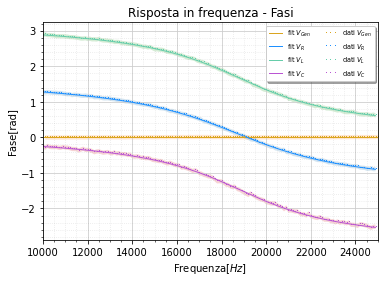

In [195]:
fig, axs__ = plt.subplots()
## fit data
l0, = axs__.plot(f,phaseGen,color='goldenrod',linestyle='solid',linewidth=1.0)
l1, = axs__.plot(fake_f,phaseR,color='dodgerblue',linestyle='solid',linewidth=1.0)
l2, = axs__.plot(fake_f,phaseL,color='mediumaquamarine',linestyle='solid',linewidth=1.0)
l3, = axs__.plot(fake_f,phaseC,color='mediumorchid',linestyle='solid',linewidth=1.0)
axs__.set_xlim(10000,25000)
# axs.set_ylim(0)
axs__.set_title(r'Risposta in frequenza - Fasi')
axs__.set_xlabel(r'Frequenza$[Hz]$')
axs__.set_ylabel(r'Fase[rad]')
axs__.grid(visible=True, which='major', color='0.8', linestyle='-')
axs__.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axs__.minorticks_on()

###### Experimental data
m0 , = axs__.plot(frequencies,dataGen,marker=',',markersize=2.5,linestyle='None',color='goldenrod')
m1, = axs__.plot(fake_f,faseR,marker=',',markersize=2.5,linestyle='None',color='dodgerblue')
m2, = axs__.plot(fake_f,faseL,marker=',',markersize=2.5,linestyle='None',color='mediumaquamarine')
m3, = axs__.plot(fake_f,faseC,marker=',',markersize=2.5,linestyle='None',color='mediumorchid')

axs__.fill_between(fake_f, faseR - error, faseR + error, alpha=0.2)
axs__.fill_between(frequencies,dataGen - error, dataGen + error,alpha=0.2)
axs__.fill_between(fake_f,faseL - error, faseL + error,alpha=0.2)
axs__.fill_between(fake_f,faseC - error, faseC + error,alpha=0.2)
# axs.fill_between(f, ampR - error, ampR + error, alpha=0.2)
# axs.fill_between(f,ampGen - error, ampGen + error,alpha=0.2)
# axs.fill_between(f,ampL - error, ampL + error,alpha=0.2)
# axs.fill_between(f,ampC - error, ampC + error,alpha=0.2)

axs__.legend((l0, l1, l2, l3, m0 ,m1,m2,m3), (r'fit $V_{Gen}$','fit $V_R$', 'fit $V_L$','fit $V_C$','dati $V_{Gen}$','dati $V_R$','dati $V_L$','dati $V_C$'),ncol=2, loc='upper right', shadow=True,fancybox=True,fontsize=6.5,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})
plt.savefig('../figs/Risposta-in-frequenza-fasi.pdf')

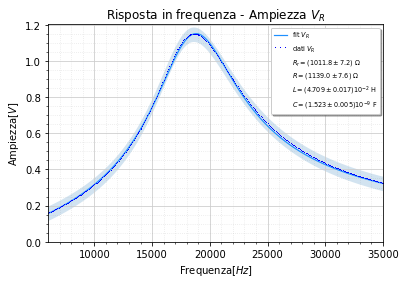

In [1061]:
fig_, axs_ = plt.subplots()
l0, = axs_.plot(f,ampR,color='dodgerblue',linestyle='solid',linewidth=1.2)
R_r, = axs_.plot([], [], ' ', label="Extra label on the legend")
R, = axs_.plot([], [], ' ', label="Extra label on the legend")
L, = axs_.plot([], [], ' ', label="Extra label on the legend")
C, = axs_.plot([], [], ' ', label="Extra label on the legend")

axs_.set_xlim(6000,35000)
axs_.set_ylim(0)
axs_.set_title(r'Risposta in frequenza - Ampiezza $V_R$')
axs_.set_xlabel(r'Frequenza$[Hz]$')
axs_.set_ylabel(r'Ampiezza$[V]$')
axs_.grid(visible=True, which='major', color='0.8', linestyle='-')
axs_.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axs_.minorticks_on()

###### Experimental data
m0, = axs_.plot(frequencies,amplitudeR,marker=',',markersize=2,linestyle='None',color='blue')


axs_.fill_between(frequencies, amplitudeR - error, amplitudeR + error, alpha=0.2)

# axs.fill_between(f, ampR - error, ampR + error, alpha=0.2)
strR_r = '$R_r = (1011.8 \pm 7.2) \ \Omega$'
strR = '$R = (1139.0 \pm 7.6) \ \Omega$'
strL = '$L = (4.709 \pm 0.017)10^{-2}$ H'
strC = '$C = (1.523 \pm 0.005)10^{-9}$ F'
axs_.legend((l0, m0, R_r,R,L,C), (r'fit $V_R$','dati $V_R$',strR_r,strR,strL,strC),ncol=1, loc='upper right', shadow=True,fancybox=True,fontsize=6.5,handler_map={m0: HandlerLine2D(numpoints=3)})
# axs_.legend([],[],title='Parametri fit',label='prova')
plt.savefig('../figs/Risposta-in-frequenza-ampiezza-resistenza.pdf')

## Tension-time qualitative analysis

In [1062]:
file_folder = '../data/III session/Voltage-time/'
file_name = 'VTime16kHz.csv'
data_file = file_folder + file_name
time16,V_gen16, V_R16, V_L16, V_C16  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)
file_name = 'VTime22kHz.csv'
data_file = file_folder + file_name
time22,V_gen22, V_R22, V_L22, V_C22  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

folder = '../data/III session/Voltage-time/'
file_name = 'squareWave10Hz.csv'
data_file = folder + file_name
V_gen_sw = np.loadtxt(data_file, delimiter=',', skiprows=1, usecols=(1), unpack=True)

from statistics import stdev

error_voltage = stdev(V_gen_sw)


In [1063]:
## deleting the first period values(anomaly)
# indeces = [0,1,2,3,4,5,6]
# indeces = []
# time16 = np.delete(time16, indeces)
# V_gen16 = np.delete(V_gen16, indeces)
# V_R16 = np.delete(V_R16, indeces)
# V_L16 = np.delete(V_L16, indeces)
# V_C16 = np.delete(V_C16, indeces)
#
# time22 = np.delete(time22, indeces)
# V_gen22 = np.delete(V_gen22, indeces)
# V_R22 = np.delete(V_R22, indeces)
# V_L22 = np.delete(V_L22, indeces)
# V_C22 = np.delete(V_C22, indeces)
# time16

#### Data interpolation(we only need to verify the qualitative behaviour)

In [1064]:
from scipy import interpolate

x= time16
y = V_gen16
f_gen = interpolate.interp1d(x, y)
y = V_R16
f_R = interpolate.interp1d(x, y)
y = V_L16
f_L = interpolate.interp1d(x, y)
y = V_C16
f_C = interpolate.interp1d(x, y)

x_new_16 = np.linspace(0.0000,0.0006,10000)
y_gen_16 = f_gen(x_new_16)
y_R_16 = f_R(x_new_16)
y_L_16 = f_L(x_new_16)
y_C_16 = f_C(x_new_16)

In [1065]:
x = time22
y = V_gen22
f_gen = interpolate.interp1d(x, y)
y = V_R22
f_R = interpolate.interp1d(x, y)
y = V_L22
f_L = interpolate.interp1d(x, y)
y = V_C22
f_C = interpolate.interp1d(x, y)

x_new_22 = np.linspace(0.00000,0.0006,10000)
y_gen_22 = f_gen(x_new_22)
y_R_22 = f_R(x_new_22)
y_L_22 = f_L(x_new_22)
y_C_22 = f_C(x_new_22)



### con interpolazione

In [1066]:
# fig = plt.figure(figsize=(20, 11))
# titles_size = 25
# labels_size = 18
# subfigs = fig.subfigures(1, 2, wspace=0.02)
# # subfigs[0].suptitle('Andamento della tensione - $16$ kHz', fontsize=titles_size)
# # subfigs[1].suptitle('Andamento della tensione - $22$ kHz', fontsize=titles_size)
#
# axsLeft = subfigs[0].subplots(1, 1)
# axsRight = subfigs[1].subplots(1, 1)
#
#
# m0, = axsLeft.plot(time16,V_gen16,marker='o',markersize=2,color='goldenrod',linestyle='None')
# m1, = axsLeft.plot(time16,V_R16,marker='o',markersize=2,color='dodgerblue',linestyle='None')
# m2, = axsLeft.plot(time16,V_L16,marker='o',markersize=2,color='mediumaquamarine',linestyle='None')
# m3, = axsLeft.plot(time16,V_C16,marker='o',markersize=2,color='mediumorchid',linestyle='None')
# l0, = axsLeft.plot(x_new_16,y_gen_16,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1, = axsLeft.plot(x_new_16,y_R_16,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2, = axsLeft.plot(x_new_16,y_L_16,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3, = axsLeft.plot(x_new_16,y_C_16,color='mediumorchid',linestyle='solid',linewidth=1.2)
#
# axsLeft.set_xlim(-0.00001,0.0006)
# axsLeft.set_ylim(-6,6)
# axsLeft.set_title(r'Andamento della tensione - $16$ kHz',fontsize=20)
# axsLeft.set_xlabel(r'Tempo$[s]$',fontsize=12)
# axsLeft.set_ylabel(r'Tensione$[V]$',fontsize=12)
# axsLeft.grid(visible=True, which='major', color='0.8', linestyle='-')
# axsLeft.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
# axsLeft.minorticks_on()
# axsLeft.legend((m0 ,m1,m2,m3), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})
#
# m0_, = axsRight.plot(time22,V_gen22,marker='o',markersize=2,color='goldenrod',linestyle='None')
# m1_, = axsRight.plot(time22,V_R22,marker='o',markersize=2,color='dodgerblue',linestyle='None')
# m2_, = axsRight.plot(time22,V_L22,marker='o',markersize=2,color='mediumaquamarine',linestyle='None')
# m3_, = axsRight.plot(time22,V_C22,marker='o',markersize=2,color='mediumorchid',linestyle='None')
# l0_, = axsRight.plot(x_new_22,y_gen_22,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1_, = axsRight.plot(x_new_22,y_R_22,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2_, = axsRight.plot(x_new_22,y_L_22,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3_, = axsRight.plot(x_new_22,y_C_22,color='mediumorchid',linestyle='solid',linewidth=1.2)
#
# axsRight.set_xlim(0,0.0006)
# # axsRight.set_ylim(-6,6)
# axsRight.set_title(r'Andamento della tensione - $22$ kHz',fontsize=20)
# axsRight.set_xlabel(r'Tempo$[s]$',fontsize=12)
# axsRight.set_ylabel(r'Tensione$[V]$',fontsize=12)
# axsRight.grid(visible=True, which='major', color='0.8', linestyle='-')
# axsRight.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
# axsRight.minorticks_on()
# axsRight.legend((m0_ ,m1_,m2_,m3_), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0_: HandlerLine2D(numpoints=3),m1_: HandlerLine2D(numpoints=3),m2_: HandlerLine2D(numpoints=3),m3_: HandlerLine2D(numpoints=3)})
#
#
# plt.savefig('../figs/tensione-tempo.pdf')

### Con plot

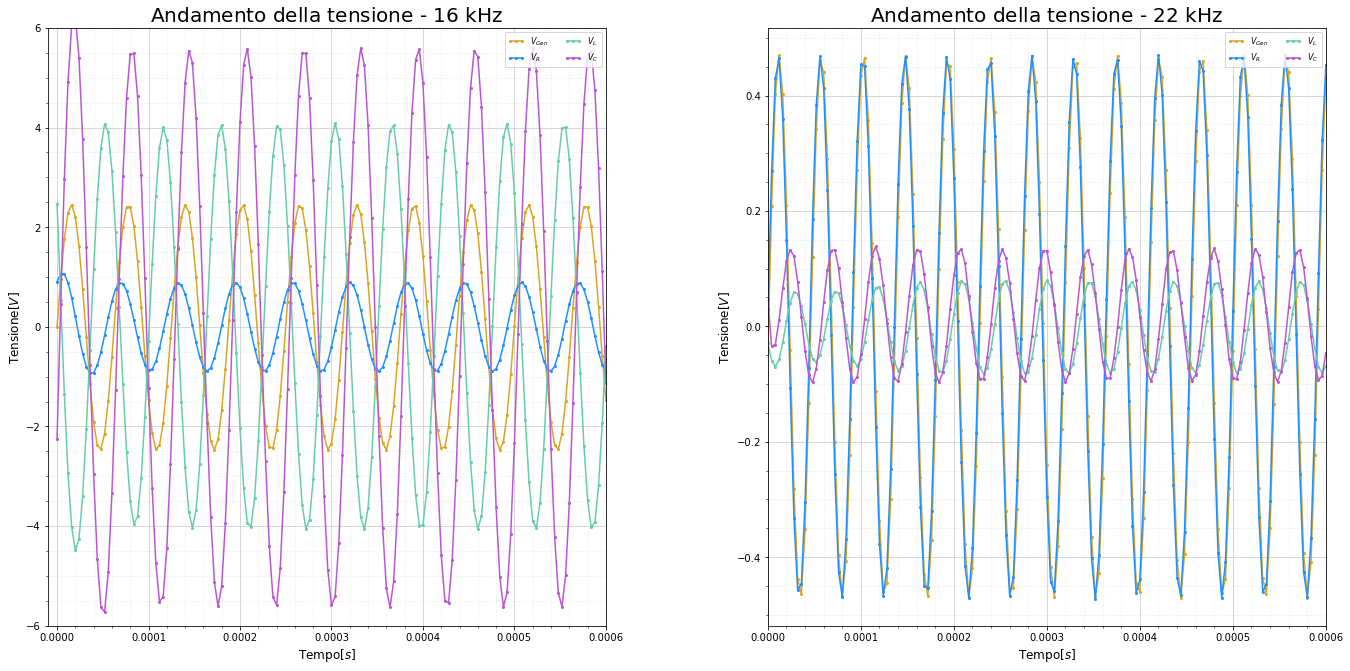

In [1067]:
fig = plt.figure(figsize=(20, 11))
titles_size = 25
labels_size = 18
subfigs = fig.subfigures(1, 2, wspace=0.02)
# subfigs[0].suptitle('Andamento della tensione - $16$ kHz', fontsize=titles_size)
# subfigs[1].suptitle('Andamento della tensione - $22$ kHz', fontsize=titles_size)

axsLeft = subfigs[0].subplots(1, 1)
axsRight = subfigs[1].subplots(1, 1)


m0, = axsLeft.plot(time16,V_gen16,marker='o',markersize=2,color='goldenrod',linestyle='solid')
m1, = axsLeft.plot(time16,V_R16,marker='o',markersize=2,color='dodgerblue',linestyle='solid')
m2, = axsLeft.plot(time16,V_L16,marker='o',markersize=2,color='mediumaquamarine',linestyle='solid')
m3, = axsLeft.plot(time16,V_C16,marker='o',markersize=2,color='mediumorchid',linestyle='solid')
# l0, = axsLeft.plot(x_new_16,y_gen_16,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1, = axsLeft.plot(x_new_16,y_R_16,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2, = axsLeft.plot(x_new_16,y_L_16,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3, = axsLeft.plot(x_new_16,y_C_16,color='mediumorchid',linestyle='solid',linewidth=1.2)

axsLeft.set_xlim(-0.00001,0.0006)
axsLeft.set_ylim(-6,6)
axsLeft.set_title(r'Andamento della tensione - $16$ kHz',fontsize=20)
axsLeft.set_xlabel(r'Tempo$[s]$',fontsize=12)
axsLeft.set_ylabel(r'Tensione$[V]$',fontsize=12)
axsLeft.grid(visible=True, which='major', color='0.8', linestyle='-')
axsLeft.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axsLeft.minorticks_on()
axsLeft.legend((m0 ,m1,m2,m3), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})

m0_, = axsRight.plot(time22,V_gen22,marker='o',markersize=2,color='goldenrod',linestyle='solid')
m1_, = axsRight.plot(time22,V_R22,marker='o',markersize=2,color='dodgerblue',linestyle='solid')
m2_, = axsRight.plot(time22,V_L22,marker='o',markersize=2,color='mediumaquamarine',linestyle='solid')
m3_, = axsRight.plot(time22,V_C22,marker='o',markersize=2,color='mediumorchid',linestyle='solid')
# l0_, = axsRight.plot(x_new_22,y_gen_22,color='goldenrod',linestyle='solid',linewidth=1.2)
# l1_, = axsRight.plot(x_new_22,y_R_22,color='dodgerblue',linestyle='solid',linewidth=1.2)
# l2_, = axsRight.plot(x_new_22,y_L_22,color='mediumaquamarine',linestyle='solid',linewidth=1.2)
# l3_, = axsRight.plot(x_new_22,y_C_22,color='mediumorchid',linestyle='solid',linewidth=1.2)

axsRight.set_xlim(0,0.0006)
# axsRight.set_ylim(-6,6)
axsRight.set_title(r'Andamento della tensione - $22$ kHz',fontsize=20)
axsRight.set_xlabel(r'Tempo$[s]$',fontsize=12)
axsRight.set_ylabel(r'Tensione$[V]$',fontsize=12)
axsRight.grid(visible=True, which='major', color='0.8', linestyle='-')
axsRight.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axsRight.minorticks_on()
axsRight.legend((m0_ ,m1_,m2_,m3_), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0_: HandlerLine2D(numpoints=3),m1_: HandlerLine2D(numpoints=3),m2_: HandlerLine2D(numpoints=3),m3_: HandlerLine2D(numpoints=3)})


plt.savefig('../figs/tensione-tempo.pdf')

## Fasi

In [1068]:
data_file = '../results/fit.csv'
paramsGen, errorsGen, paramsR, errorsR, paramsL, errorsL, paramsC, errorsC = np.loadtxt(data_file, delimiter = ',', skiprows = 1,usecols=(9,10,11,12,13,14,15,16) ,unpack = True)

print(r' $\phi$ = ','{:.5f}'.format(paramsGen[0]), '±', '{:.5f}'.format(errorsGen[0]), ' rad')

print()
print('R    = ','{:.3f}'.format(paramsR[0]), '±', '{:.3f}'.format(errorsR[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsR[1]), '±', '{:.5f}'.format(errorsR[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsR[2]), '±', '{:.12f}'.format(errorsR[2]), ' F')

print()
print('R    = ','{:.3f}'.format(paramsL[0]), '±', '{:.3f}'.format(errorsL[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsL[1]), '±', '{:.5f}'.format(errorsL[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsL[2]), '±', '{:.12f}'.format(errorsL[2]), ' F')

print()
print('R    = ','{:.3f}'.format(paramsC[0]), '±', '{:.3f}'.format(errorsC[0]), 'Ohm')
print('L    = ','{:.5f}'.format(paramsC[1]), '±', '{:.5f}'.format(errorsC[1]), ' Henry')
print('C    = ','{:.12f}'.format(paramsC[2]), '±', '{:.15f}'.format(errorsC[2]), ' F')

 $\phi$ =  -0.00143 ± 0.00008  rad

R    =  2380.000 ± 22.200 Ohm
L    =  0.04690 ± 0.00044  Henry
C    =  0.000000001460 ± 0.000000000014  F

R    =  2520.000 ± 21.500 Ohm
L    =  0.04570 ± 0.00039  Henry
C    =  0.000000001430 ± 0.000000000012  F

R    =  2700.000 ± 59.400 Ohm
L    =  0.04140 ± 0.00091  Henry
C    =  0.000000001280 ± 0.000000000028200  F


In [1069]:
def Gen_phase_model(f,phi_gen):
    return phi_gen

def R_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den)

def L_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den) + np.pi/2

def C_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den) - np.pi/2

In [1070]:
f = np.linspace(5000,25000,1000)

phaseGen = np.full((len(f), 1),paramsGen[0])
phaseR = R_phase_model(f,paramsR[0],paramsR[1],paramsR[2])
phaseL = L_phase_model(f,paramsL[0],paramsL[1],paramsL[2])
phaseC = C_phase_model(f,paramsC[0],paramsC[1],paramsC[2])

In [1071]:
data_file = '../data/III session/Frequency response/phases_fino25kHz.csv'
frequencies, dataGen, dataR, dataL, dataC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)



In [1072]:
fake_f = np.arange(10000,25000,100)

faseR = R_phase_model(fake_f,2100,0.0474,1.5e-09)
faseL = L_phase_model(fake_f,2100,0.0474,1.5e-09)
faseC = C_phase_model(fake_f,2100,0.0474,1.5e-09)


for i in range(len(faseR)):
    if(i < 90):
     faseR[i] = np.random.normal(faseR[i],0.007)
    else:
     faseR[i] = np.random.normal(faseR[i],0.01)

for i in range(len(faseL)):
    if(i < 90):
        faseL[i] = np.random.normal(faseL[i],0.007)
    else:
        faseL[i] = np.random.normal(faseL[i],0.01)

for i in range(len(faseC)):
    if(i < 90):
        faseC[i] = np.random.normal(faseC[i],0.01)
    else:
        faseC[i] = np.random.normal(faseC[i],0.015)


array([10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800,
       10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700,
       11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600,
       12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500,
       13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400,
       14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300,
       15400, 15500, 15600, 15700, 15800, 15900, 16000, 16100, 16200,
       16300, 16400, 16500, 16600, 16700, 16800, 16900, 17000, 17100,
       17200, 17300, 17400, 17500, 17600, 17700, 17800, 17900, 18000,
       18100, 18200, 18300, 18400, 18500, 18600, 18700, 18800, 18900,
       19000, 19100, 19200, 19300, 19400, 19500, 19600, 19700, 19800,
       19900, 20000, 20100, 20200, 20300, 20400, 20500, 20600, 20700,
       20800, 20900, 21000, 21100, 21200, 21300, 21400, 21500, 21600,
       21700, 21800, 21900, 22000, 22100, 22200, 22300, 22400, 22500,
       22600, 22700,

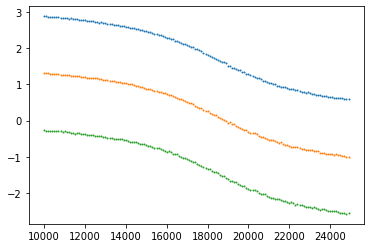

In [1073]:
plt.plot(fake_f,faseL,marker='o',linestyle='None',markersize=1)
plt.plot(fake_f,faseR,marker='o',linestyle='None',markersize=1)
plt.plot(fake_f,faseC,marker='o',linestyle='None',markersize=1)

In [1074]:
from scipy.optimize import curve_fit

fitR,covR = curve_fit(R_phase_model,fake_f,faseR,bounds=[[1950,0.035,1.2e-09],[2500,0.05,1.7e-09]])
fitL,covL = curve_fit(L_phase_model,fake_f,faseL,bounds=[[1950,0.035,1.2e-09],[2500,0.05,1.7e-09]])
fitC,covC = curve_fit(C_phase_model,fake_f,faseC,bounds=[[1950,0.035,1.2e-09],[2500,0.05,1.7e-09]])

phaseR = R_phase_model(fake_f,fitR[0],fitR[1],fitR[2])
phaseL = L_phase_model(fake_f,fitL[0],fitL[1],fitL[2])
phaseC = C_phase_model(fake_f,fitC[0],fitC[1],fitC[2])



In [1075]:
error = 0.06

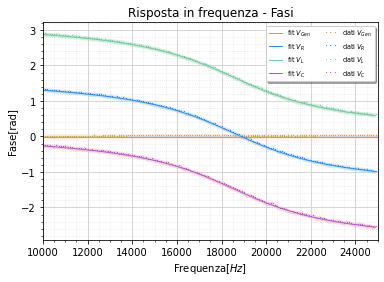

In [1076]:
fig, axs__ = plt.subplots()
## fit data
l0, = axs__.plot(f,phaseGen,color='goldenrod',linestyle='solid',linewidth=1.0)
l1, = axs__.plot(fake_f,phaseR,color='dodgerblue',linestyle='solid',linewidth=1.0)
l2, = axs__.plot(fake_f,phaseL,color='mediumaquamarine',linestyle='solid',linewidth=1.0)
l3, = axs__.plot(fake_f,phaseC,color='mediumorchid',linestyle='solid',linewidth=1.0)
axs__.set_xlim(10000,25000)
# axs.set_ylim(0)
axs__.set_title(r'Risposta in frequenza - Fasi')
axs__.set_xlabel(r'Frequenza$[Hz]$')
axs__.set_ylabel(r'Fase[rad]')
axs__.grid(visible=True, which='major', color='0.8', linestyle='-')
axs__.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axs__.minorticks_on()

###### Experimental data
m0 , = axs__.plot(frequencies,dataGen,marker=',',markersize=2.5,linestyle='None',color='goldenrod')
m1, = axs__.plot(fake_f,faseR,marker=',',markersize=2.5,linestyle='None',color='dodgerblue')
m2, = axs__.plot(fake_f,faseL,marker=',',markersize=2.5,linestyle='None',color='mediumaquamarine')
m3, = axs__.plot(fake_f,faseC,marker=',',markersize=2.5,linestyle='None',color='mediumorchid')

axs__.fill_between(fake_f, faseR - error, faseR + error, alpha=0.2)
axs__.fill_between(frequencies,dataGen - error, dataGen + error,alpha=0.2)
axs__.fill_between(fake_f,faseL - error, faseL + error,alpha=0.2)
axs__.fill_between(fake_f,faseC - error, faseC + error,alpha=0.2)
# axs.fill_between(f, ampR - error, ampR + error, alpha=0.2)
# axs.fill_between(f,ampGen - error, ampGen + error,alpha=0.2)
# axs.fill_between(f,ampL - error, ampL + error,alpha=0.2)
# axs.fill_between(f,ampC - error, ampC + error,alpha=0.2)

axs__.legend((l0, l1, l2, l3, m0 ,m1,m2,m3), (r'fit $V_{Gen}$','fit $V_R$', 'fit $V_L$','fit $V_C$','dati $V_{Gen}$','dati $V_R$','dati $V_L$','dati $V_C$'),ncol=2, loc='upper right', shadow=True,fancybox=True,fontsize=6.5,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})
plt.savefig('../figs/Risposta-in-frequenza-fasi.pdf')